In [2]:
import pandas as pd
df= pd.read_csv('C:/Users/Danny Chacko/Downloads/test1.csv')
def s(word):
    return word.strip()
df['Date']= df['Date'].apply(s)

There are a total of 2936798 values in our dataset, with 829 rows and 8567 columns.
The most used word is 'the'.
The most used number is 000.


<IPython.core.display.Javascript object>


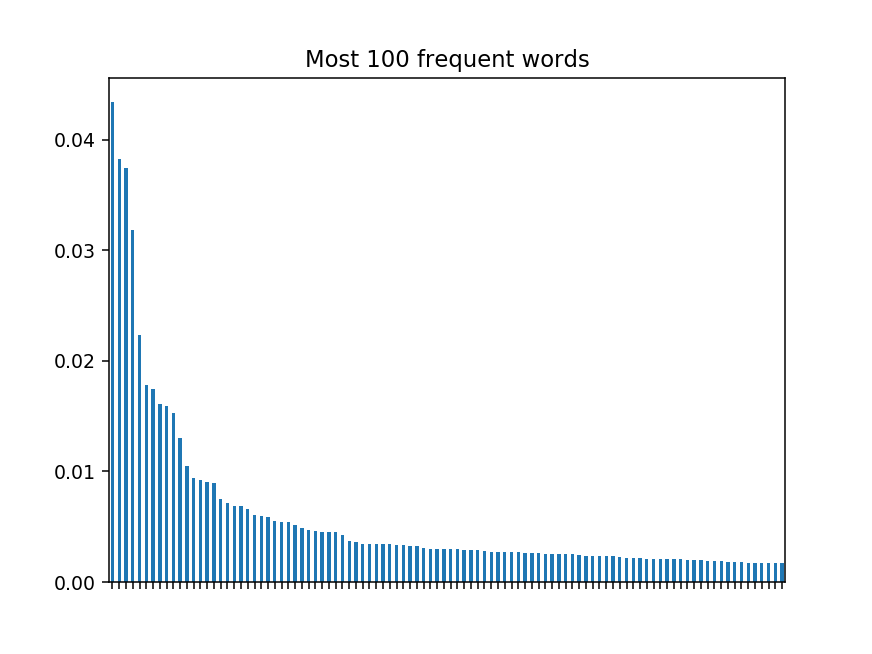

[]

In [6]:
%matplotlib notebook
sums= df.sum(axis=0)
#To get columns with letter A or a in name, just do df.filter(regex= '[aA]'), same for no.s
#Automate column dropping is string late
sums_filter= sums.drop(['Date', 'Title', 'Name'])
#sums= sums.reset_index
# Looking at data overall
sums_filter= sums_filter.astype('int64') #convert from object to int64 type
total= sums_filter.sum(axis=0)
print("There are a total of", total, "values in our dataset, with", df.shape[0], "rows and", df.shape[1], "columns.")

word= sums_filter.filter(regex= '^[A-Za-z]+$', axis=0)
print("The most used word is", "'" + word.idxmax() +"'.")

number= sums_filter.filter(regex= '[0-9]', axis=0)
print("The most used number is", number.idxmax() + ".")

sums_filter= sums_filter.sort_values(ascending= False)
top_100= sums_filter[:100]/total
import matplotlib.pyplot as plt
plt.title('Most 100 frequent words')
frame_1= top_100.plot(kind="bar")
frame_1.axes.xaxis.set_ticklabels([])

In [51]:
top_25= sums_filter[:25]/total
plt.title('Top 25 words overall')
top_25.plot(kind="bar")

In [42]:
min(sums_filter)

6

There are a total of 94161 values and 4253 distinct values for 31 speeches by Scott Morrison.
Scott Morrison had used 4104 distinct words altogether.
Most common word for Scott Morrison is 'the', occuring 4876 times.
The median frequency of words for Scott Morrison is 3.0
The mean frequency of words for Scott Morrison is 22



<IPython.core.display.Javascript object>


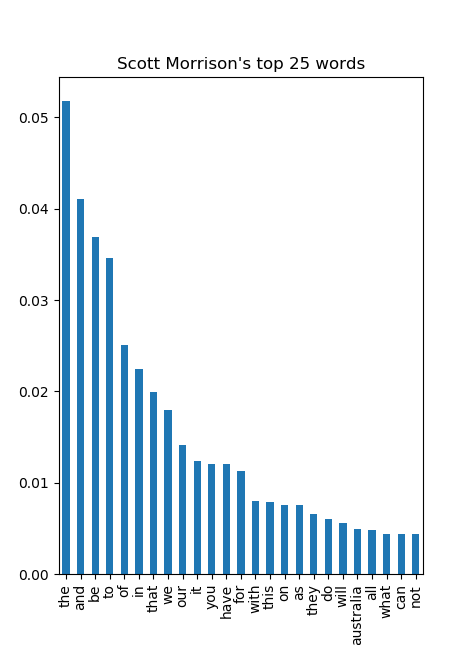

There are a total of 2365464 values and 8058 distinct values for 572 speeches by Donald Trump.
Donald Trump had used 7787 distinct words altogether.
Most common word for Donald Trump is 'the', occuring 93080 times.
The median frequency of words for Donald Trump is 18.0
The mean frequency of words for Donald Trump is 293



<IPython.core.display.Javascript object>


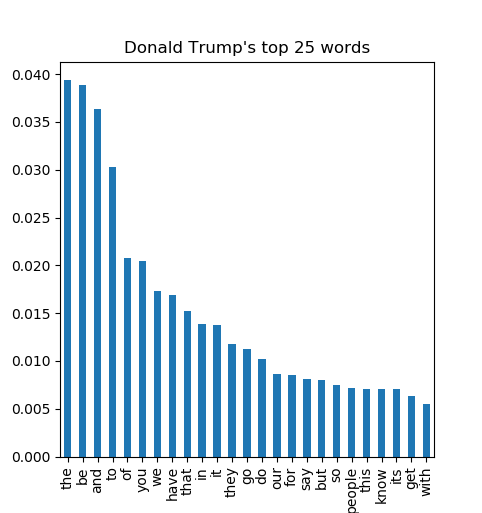

There are a total of 477173 values and 6211 distinct values for 226 speeches by Theresa May.
Theresa May had used 6001 distinct words altogether.
Most common word for Theresa May is 'the', occuring 29517 times.
The median frequency of words for Theresa May is 8.0
The mean frequency of words for Theresa May is 76



<IPython.core.display.Javascript object>


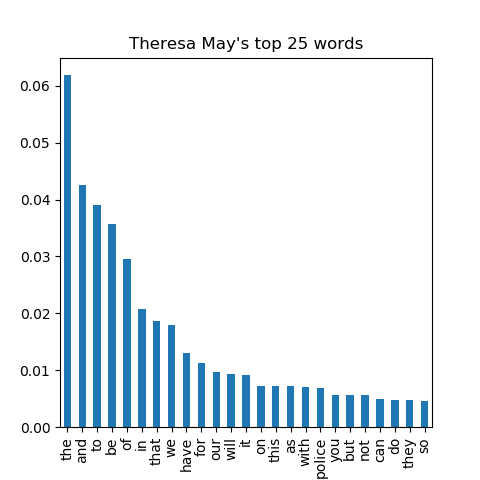

In [11]:
def filter_by_name(names):
    name = df['Name'] == str(names)
    name_data = df[name]
    name_sum = name_data.sum(axis=0)
    name_sum = name_sum.drop(['Date', 'Title', 'Name'])
    name_sum = name_sum.astype('int64') #convert from object to int64 type
    name_sum = name_sum.sort_values(ascending= False)
    total= name_sum.sum(axis=0)
    top25= name_sum[:25]/total

    fig = plt.figure(figsize=plt.figaspect(1.))
    #ax= fig.add_subplot(2, 2, h)
    top25.plot(kind="bar")
    plt.title(names + "'s top 25 words")
        
        
def name_summary(names):
    name = df['Name'] == names
    name_data = df[name]
    name_sum = name_data.sum(axis=0)
    name_sum = name_sum.drop(['Date', 'Title', 'Name'])
    name_sum = name_sum.astype('int64')
    name_sum= name_sum[name_sum != 0] # To remove rows that have 0 in it

    #Getting total no.
    total= name_sum.sum(axis=0)   
    distinct= name_sum.count()
    print("There are a total of", total, "values and", distinct, "distinct values for", name_data.shape[0], "speeches by", names + ".")

    #Distinct words
    words= name_sum.filter(regex= '^[A-Za-z]+$', axis=0)
    words_distinct= words.count()
    print(names + " had used", words_distinct, "distinct words altogether.")

    print("Most common word for " + str(i) + " is" + " '" + name_sum.idxmax() + "'" + ", occuring", name_sum.max(), "times.")

    #Getting median frequency of word
    median= name_sum.median()
    print("The median frequency of words for " + names + " is " + str(median))

    #Getting mean frequency of word
    mean= int(name_sum.mean())
    print("The mean frequency of words for " + names + " is " + str(mean))
    print() 
    
names= df['Name'].unique().tolist()
for i in names:
    name_summary(i)
    filter_by_name(i)

Most common word for 2010 is 'the', occuring 1232 times.


<IPython.core.display.Javascript object>


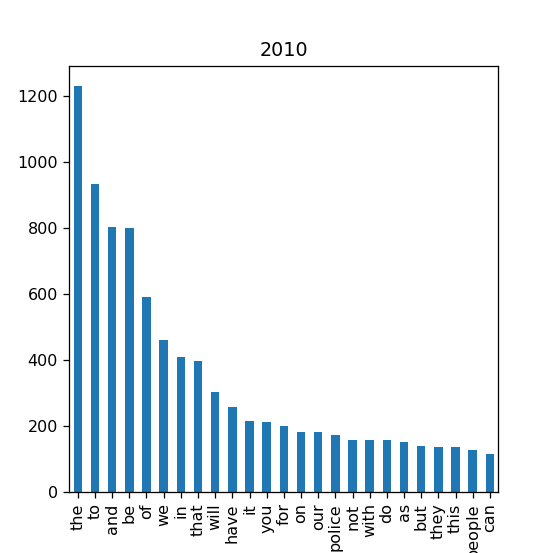

Most common word for 2011 is 'the', occuring 3259 times.


<IPython.core.display.Javascript object>


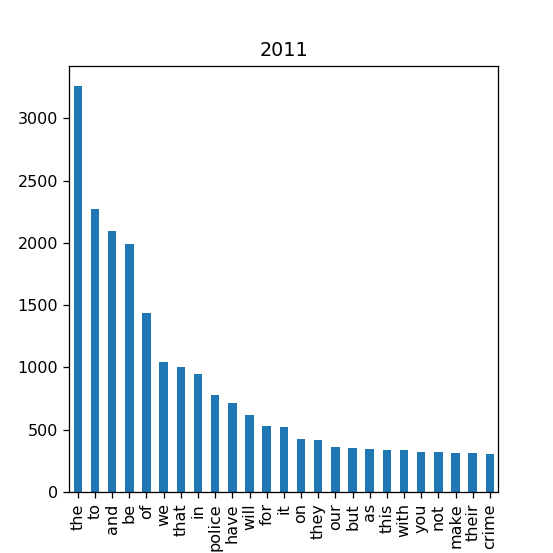

Most common word for 2012 is 'the', occuring 2155 times.


<IPython.core.display.Javascript object>


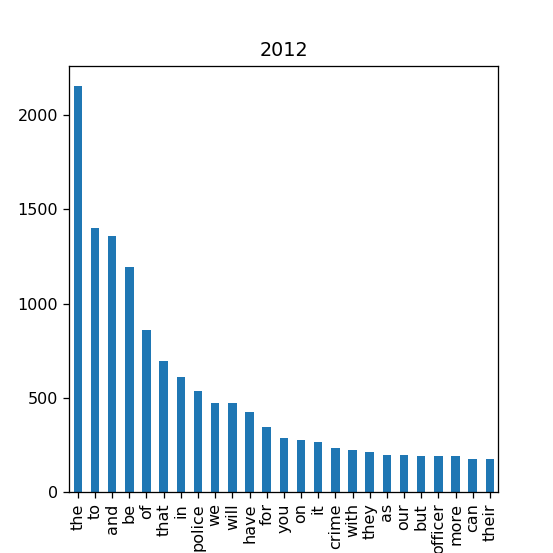

Most common word for 2013 is 'the', occuring 1264 times.


<IPython.core.display.Javascript object>


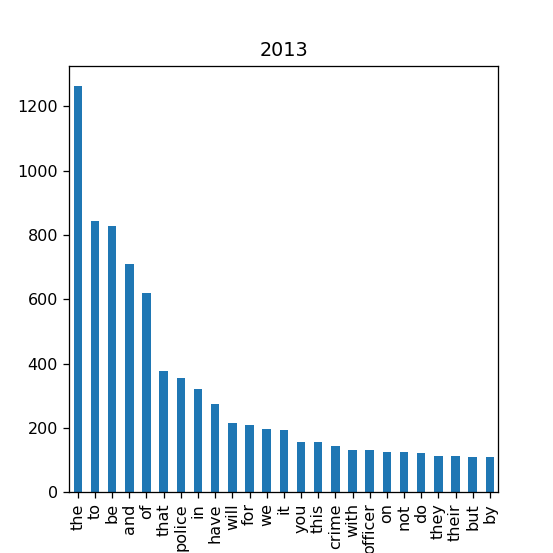

Most common word for 2014 is 'the', occuring 2266 times.


<IPython.core.display.Javascript object>


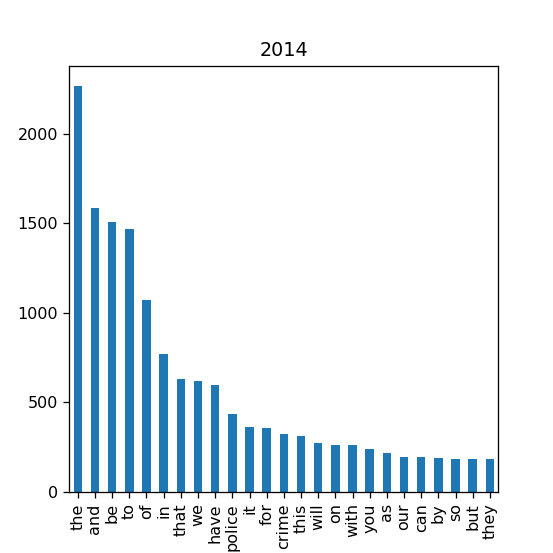

Most common word for 2015 is 'the', occuring 1984 times.


<IPython.core.display.Javascript object>


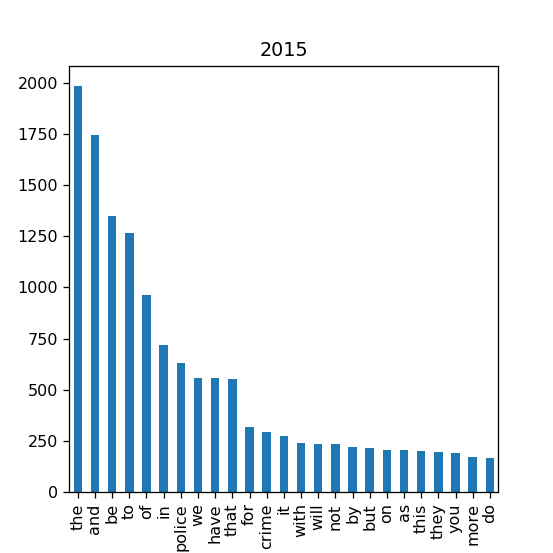

Most common word for 2016 is 'the', occuring 39618 times.


<IPython.core.display.Javascript object>


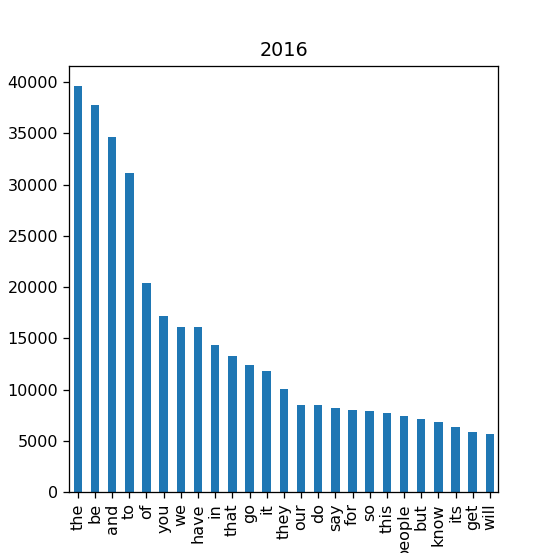

Most common word for 2017 is 'the', occuring 19455 times.


<IPython.core.display.Javascript object>


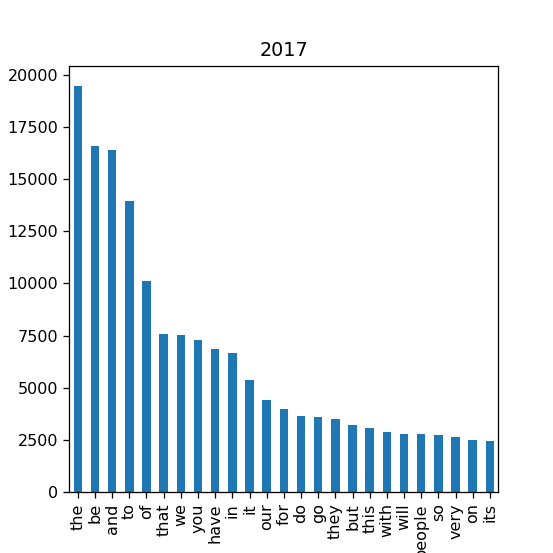

Most common word for 2018 is 'the', occuring 28396 times.


<IPython.core.display.Javascript object>


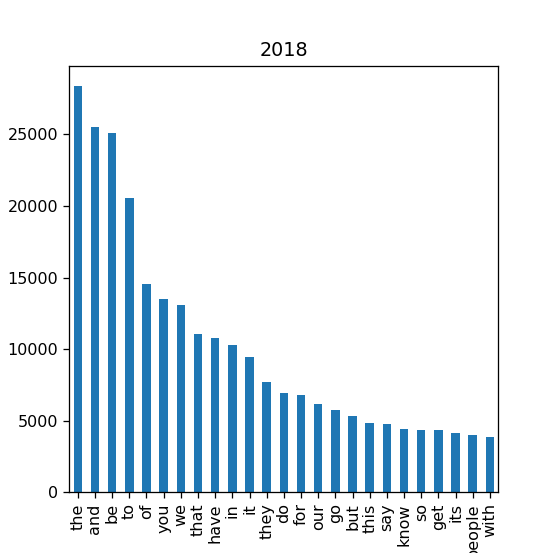

Most common word for 2019 is 'the', occuring 23951 times.


<IPython.core.display.Javascript object>


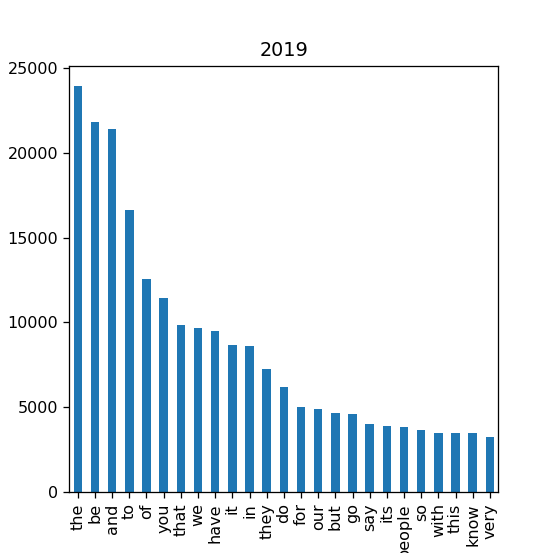

In [39]:
%matplotlib notebook
date_frame= df.copy()
date= date_frame['Date'].str.split(" ",n = 2, expand = True)#n controls how many splits I'm having, expand expands the splits to separate columns
date_frame['Date']= date[2]
year= date[2].unique().tolist()

h= []
for i in year:
    if isinstance(i, str) == False:
        h.append(i)
    elif i.isnumeric() == False:
        h.append(i)

for i in h:
    year.remove(i) #doing it this way, otherwise if I just did remove above, all won't be removed, as some will be skipped over 
    
def yearly_plot(year):
    years = date_frame['Date'] == year
    year_plot= date_frame[years]
    year_sum = year_plot.sum(axis=0)
    year_sum = year_sum.drop(['Date', 'Title', 'Name'])
    year_sum = year_sum.astype('int64') #convert from object to int64 type
    print("Most common word for " + year + " is" + " '" + year_sum.idxmax() + "'" + ", occuring", year_sum.max(), "times.")
    year_sum = year_sum.sort_values(ascending= False)
    top25= year_sum[:25]
        
    fig = plt.figure(figsize=plt.figaspect(1.))
    #ax= fig.add_subplot(2, 2, h)
    top25.plot(kind="bar")
    plt.title(year)
    
def yearly_summary(year):
    years = date_frame['Date'] == year
    year_plot= date_frame[years]
    year_sum = year_plot.sum(axis=0)
    year_sum = year_sum.drop(['Date', 'Title', 'Name'])
    year_sum = year_sum.astype('int64')
    year_sum= year_sum[year_sum != 0] # To remove rows that have 0 in it
    
    #Getting total no.
    total= year_sum.sum(axis=0)   
    distinct= year_sum.count()
    print("There are a total of", total, "values and", distinct, "distinct values in", year + ".")
    
    #Getting median frequency of word
    median= year_sum.median()
    print("The median frequemcy of words in this year is", median)
     
    #Getting mean frequency of word
    mean= year_sum.mean()
    print("The mean frequemcy of words in this year is", int(mean))
    print(str(year_plot.shape))
    print()
    
    

for i in sorted(year):
    yearly_summary(i)
    yearly_plot(i)

In [38]:
for i in sorted(year):
    years = date_frame['Date'] == i
    year_plot= date_frame[years]
    name= year_plot['Name'].unique().tolist()
    for h in name:
        person = year_plot['Name']== h
        person_data= year_plot[person]
        print(h, "has", person_data.shape[0], "speeches in", i + ".")
    print()

Theresa May has 8 speeches in 2010.

Theresa May has 24 speeches in 2011.

Theresa May has 16 speeches in 2012.

Theresa May has 11 speeches in 2013.

Theresa May has 17 speeches in 2014.

Theresa May has 11 speeches in 2015.

Donald Trump has 175 speeches in 2016.
Theresa May has 22 speeches in 2016.

Donald Trump has 108 speeches in 2017.
Theresa May has 45 speeches in 2017.

Scott Morrison has 14 speeches in 2018.
Donald Trump has 106 speeches in 2018.
Theresa May has 50 speeches in 2018.

Scott Morrison has 17 speeches in 2019.
Donald Trump has 90 speeches in 2019.
Theresa May has 22 speeches in 2019.

